# Lista de Exercícios 06

In [23]:
import numpy as np
from math import *
from copy import deepcopy
from sympy import *
from prettytable import PrettyTable
import matplotlib.pyplot as plt

y, yy, t = symbols('y yy t')

init_printing(use_unicode=True)

### Métodos auxiliares

Antes de iniciar o estudo para Solução Numérica de Equações Diferenciais Parciais, vamos definir os seguintes métodos auxiliares:

In [24]:
# Support Functions

def changeValuesInFuction(function, valueArray):
	global symbolsList
	func = deepcopy(function)
	for k in range(len(symbolsList)):
		func = func.subs(symbolsList[k], valueArray[k])
	return func


def table(results):
	table = PrettyTable(["t", "Result"])

	for result in results:
		table.add_row([result[0], result[1]])
	return table

def tableComparison(results, exactSolution):
	func = deepcopy(exactSolution)
	table = PrettyTable(["t", "Result", "Exact Solution"])

	for result in results:
		table.add_row([result[0], result[1], func.subs(t,result[0])])
	return table

## Métodos Númericos para resolver ODE de primeira ordem

Origem na Série de Taylor. São métodos para integração numérica com o objetivo de solucionar equações diferenciais ordinárias com um valor inicial dado.

O método funciona a partir da escolha de um valor para o incremento de tempo *(passo de integração)* e atribuindo a cada passo um ponto dentro do intervalo, sendo o próximo passo definido a partir do anterior. Importante notar que a precisão depende muito do tamanho do passo de integração h.

**Exemplificando para Euler:**

$$X_{k+1} = X_k +K_1h$$
$$K_1 = f(t_k,x_k)$$

A Série de Taylor é truncada em certo termo *(dependendo do algoritmo) *para trazer uma aproximação da solução da ODE.

Para os métodos da Família Runge-Kutta a ideia básica é aumentar o número de termos na expansão em série de Taylor para efetuar a integração, esta modificação tem o objetivo de melhorar a aproximação para a solução exata.

In [25]:
## 1 a) Euler Method
def integrateEulerMethod(function, delta, X0, maximumT):
	"""
	Implements: Euler Method to solve ODE First-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		maximumT: limit of integration (0 <= t <= maximumT)
	Return: array [[t,result]] of analyzed function 
	"""
    
	print("## Running Euler Method\n")
	X_list = [X0]
	t = 0.0
	index = 0
	results = [[t,X0]]

	while (t < maximumT):
		new_x = X_list[index] + delta * changeValuesInFuction(function, [t, X_list[index]])
		X_list.append(new_x)

		index += 1
		t = index * delta

		results.append([t,new_x])

	return results

In [26]:
## 1 b) Runge-Kutta second-order Method
def integrateRungeKutta2Method(function, delta, X0, maximumT):
	"""
	Implements: Runge-Kutta second-order Method to solve ODE First-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		maximumT: limit of integration (0 <= t <= maximumT)
	Return: array [[t,result]] of analyzed function 
	"""
    
	print("## Running Runge-Kutta second-order Method\n")
	X_list = [X0]
	t = 0.0
	index = 0
	results = [[t,X0]]

	while (t < maximumT):

		K1 = changeValuesInFuction(function, [t, X_list[index]])
		K2 = changeValuesInFuction(function, [t + delta, X_list[index] + delta * K1])

		new_x = X_list[index] + delta/2 * (K1 + K2)
		X_list.append(new_x)

		# print("#### t: ", t, " ## K1: ", K1: ", K1, " ## K2: ", K2)

		index += 1
		t = index * delta

		results.append([t,new_x])

	return results

In [27]:
## 1 c) Runge-Kutta fourth-order Method
def integrateRungeKutta4Method(function, delta, X0, maximumT):
	"""
	Implements: Runge-Kutta fourth-order Method to solve ODE First-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		maximumT: limit of integration (0 <= t <= maximumT)
	Return: array [[t,result]] of analyzed function 
	"""

	print("## Running Runge-Kutta fourth-order Method\n")
	X_list = [X0]
	t = 0.0
	index = 0
	results = [[t,X0]]

	while (t < maximumT):

		K1 = changeValuesInFuction(function, [t, X_list[index]])
		K2 = changeValuesInFuction(function, [t + delta/2, X_list[index] + delta/2 * K1])
		K3 = changeValuesInFuction(function, [t + delta/2, X_list[index] + delta/2 * K2])
		K4 = changeValuesInFuction(function, [t + delta, X_list[index] + delta * K3])

		new_x = X_list[index] + delta/6 * (K1 + 2*K2 + 2*K3 + K4)
		X_list.append(new_x)

		# print("#### t: ", t, " ## K1: ", K1, " ## K2: ", K2, " ## K3: ", K3, " ## K4: ", K4)

		index += 1
		t = index * delta

		results.append([t,new_x])

	return results

## Métodos Númericos para resolver ODE de segunda ordem

Os métodos númericos para a solução de ODE de segunda ordem também possuem origem na Série de Taylor. São métodos para integração numérica com o objetivo de solucionar equações diferenciais ordinárias com um valor inicial dado.

Para aproximaçao em Série de Taylor é realizado o truncamento até as derivadas de segunda ordem:

$$x_0'' = x''(t_0) = f_0(t_0,x_0,x_0')$$
$$x_1 = x(t+h) = x_0 + x_0'h + \frac{x_0''h²}{2}$$
$$x_1' = x'(t+h) = x_0' +x_0''h $$

Para Runge-Kutta-Nystrom o método busca a solução numérica de uma equação integral, substituindo a integral por uma soma ponderada representativa.

$$x_{k+1} = x_k + h(x_k'+ \frac{K_1+K_2+K_3}{3})$$ 
$$x_{k+1}' = x_k' +h(K_1 + 2K_2 + 2K_3 + K_4)$$

In [28]:
## 2 a) Second order Taylor approximation
def taylorSerieAproximation(function, delta, X0, XX0, maximumT):
	"""
	Implements: Second order Taylor approximation to solve ODE Second-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		XX0: initial condition x'(0)
		maximumT: limit of integration (0 <= t <= maximumT)
	Return: array [[t,result]] of analyzed function
	"""
    
	print("## Running Second order Taylor approximation\n")
	X_list = [X0]
	XX_list = [XX0]
	XXX_list = []
	t = 0.0
	index = 0
	results = [[t,X0]]

	while (t < maximumT):

		# x''(t) = f(t, x, x')
		current_xxx = changeValuesInFuction(function, [t, X_list[index], XX_list[index]])
		XXX_list.append(current_xxx)

		# x(t+h) = x(t) + x'(t) * h + x''(t)/2 * hˆ2
		new_x = X_list[index] + XX_list[index] * delta + XXX_list[index]/2 * delta**2
		X_list.append(new_x)

		# x'(t+h) = x'(t) + x''(t) * h
		new_xx = XX_list[index] + XXX_list[index] * delta
		XX_list.append(new_xx)

		index += 1
		t = index * delta

		# print("## t: ", t, " x: ", new_x, "x': ", new_xx, "x''(t-h): ", current_xxx)
		results.append([t,new_x])

	return results

In [29]:
## 2 b) Runge Kutta Nystrom Method
def rungeKuttaNystrom(function, delta, X0, XX0, maximumT):
	"""
	Implements: Runge Kutta Nystrom Method to solve ODE Second-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		XX0: initial condition x'(0)
		maximumT: limit of integration (0 <= t <= maximumT)
	Return: array [[t,result]] of analyzed function
	"""
    
	print("## Running Runge Kutta Nystrom Method\n")
	X_list = [X0]
	XX_list = [XX0]
	t = 0.0
	index = 0
	results = [[t,X0]]

	while (t < maximumT):

		K1 = delta/2 * changeValuesInFuction(function, [t, X_list[index], XX_list[index]])
		Q  = delta/2 * (XX_list[index] + K1/2)
		K2 = delta/2 * changeValuesInFuction(function, [t + delta/2, X_list[index] + Q, XX_list[index] + K1])
		K3 = delta/2 * changeValuesInFuction(function, [t + delta/2, X_list[index] + Q, XX_list[index] + K2])
		L  = delta * (XX_list[index] + K3)
		K4 = delta/2 * changeValuesInFuction(function, [t + delta, X_list[index] + L, XX_list[index] + 2 * K3])

		new_x = X_list[index] + delta * (XX_list[index] + 1/3 * (K1 + K2 + K3))
		
		new_xx = XX_list[index] + 1/3 * (K1 + 2*K2 + 2*K3 + K4)

		X_list.append(new_x)
		XX_list.append(new_xx)

		# print("#### t: ", t, " ## K1: ", K1: ", K1, " ## Q: ", Q, " ## K2: ", K2, " ## K3: ", K3, " ## L: ", L, " ## K4: ", K4)

		index += 1
		t = index * delta

		results.append([t,new_x])

	return results

In [30]:
## 1 ODE First-Order
def integrateMethod(function, delta, X0, maximumT, order, exactSolution = 0):
	"""
	Implements: Solve ODE First-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		maximumT: limit of integration (0 <= t <= maximumT)
		order: related to the algorithm that will be used
		exactSolution: function that represents the exact result of the algorithm
	Return: print table and graph of [[t,result]] and add exactSoluction on table if provided
	""" 
    
	# order 1 = Euler Method
	# order 2 = Runge-Kutta second-order Method
	# order 4 = Runge-Kutta fourth-order Method

	# define symbols that will be used
	global symbolsList
	symbolsList = [t, y]

	title = ""
	results = []

	if (order == 1):
		title = "Order 1 - Euler Method"
		results = integrateEulerMethod(function, delta, X0, maximumT)
	elif (order == 2):
		title = "Order 2 - Runge-Kutta second-order Method"
		results = integrateRungeKutta2Method(function, delta, X0, maximumT)
	elif (order == 4):
		title = "Order 4 - Runge-Kutta fourth-order Method"
		results = integrateRungeKutta4Method(function, delta, X0, maximumT)
	else:
		print("Order not defined. Please choose 1, 2 or 4.")
		return

	if exactSolution == 0:
		print(table(results),"\n\n")
	else:
		print(tableComparison(results, exactSolution),"\n\n")

	x_val = [x[0] for x in results]
	y_val = [x[1] for x in results]

	plt.title(title)
	plt.plot(x_val,y_val)
	plt.plot(x_val,y_val,'or')
	plt.xticks(x_val)
	plt.show()

## Exemplos do slide para ODE de primeira ordem

x'(t) = t + x(t)

Condição inicial x(0) = 0.0

SoluçãoExata x(t) = eˆt-t-1 deltaT = 0.1

## Running Euler Method

+---------------------+--------------------+---------------------+
|          t          |       Result       |    Exact Solution   |
+---------------------+--------------------+---------------------+
|         0.0         |        0.0         |          0          |
|         0.1         |         0          | 0.00517091807564762 |
|         0.2         | 0.0100000000000000 |  0.0214027581601699 |
| 0.30000000000000004 | 0.0310000000000000 |  0.0498588075760031 |
|         0.4         | 0.0641000000000000 |  0.0918246976412704 |
|         0.5         | 0.110510000000000  |  0.148721270700128  |
|  0.6000000000000001 | 0.171561000000000  |  0.222118800390509  |
|  0.7000000000000001 | 0.248717100000000  |  0.313752707470476  |
|         0.8         | 0.343588810000000  |  0.425540928492468  |
|         0.9         | 0.457947691000000  |  0.559603111156950  |
|         1.0         | 0.593742460100000  |  0.718281828459045  |
+---------------------+--------------

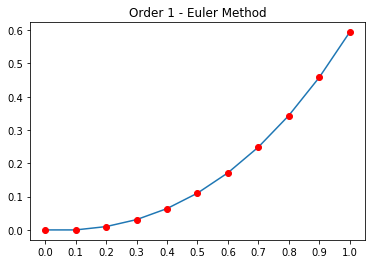

In [31]:
sampleFunction1 = t + y
deltaT = 0.1
X0 = 0.0
maximumT = 1.0
exactSolution = exp(t)-t-1

integrateMethod(sampleFunction1, deltaT, X0, maximumT, 1, exactSolution)

## Running Runge-Kutta second-order Method

+---------------------+---------------------+---------------------+
|          t          |        Result       |    Exact Solution   |
+---------------------+---------------------+---------------------+
|         0.0         |         0.0         |          0          |
|         0.1         | 0.00500000000000000 | 0.00517091807564762 |
|         0.2         |  0.0210250000000000 |  0.0214027581601699 |
| 0.30000000000000004 |  0.0492326250000000 |  0.0498588075760031 |
|         0.4         |  0.0909020506250000 |  0.0918246976412704 |
|         0.5         |  0.147446765940625  |  0.148721270700128  |
|  0.6000000000000001 |  0.220428676364391  |  0.222118800390509  |
|  0.7000000000000001 |  0.311573687382652  |  0.313752707470476  |
|         0.8         |  0.422788924557830  |  0.425540928492468  |
|         0.9         |  0.556181761636402  |  0.559603111156950  |
|         1.0         |  0.714080846608225  |  0.718281828459045  |
+---

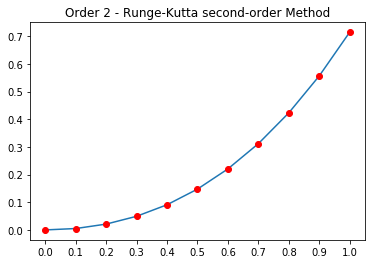

In [32]:
integrateMethod(sampleFunction1, deltaT, X0, maximumT, 2, exactSolution)

## Running Runge-Kutta fourth-order Method

+---------------------+---------------------+---------------------+
|          t          |        Result       |    Exact Solution   |
+---------------------+---------------------+---------------------+
|         0.0         |         0.0         |          0          |
|         0.1         | 0.00517083333333333 | 0.00517091807564762 |
|         0.2         |  0.0214025708506944 |  0.0214027581601699 |
| 0.30000000000000004 |  0.0498584970625377 |  0.0498588075760031 |
|         0.4         |  0.0918242400806857 |  0.0918246976412704 |
|         0.5         |  0.148720638596838  |  0.148721270700128  |
|  0.6000000000000001 |  0.222117962091933  |  0.222118800390509  |
|  0.7000000000000001 |  0.313751626596777  |  0.313752707470476  |
|         0.8         |  0.425539563292315  |  0.425540928492468  |
|         0.9         |  0.559601413780071  |  0.559603111156950  |
|         1.0         |  0.718279744135166  |  0.718281828459045  |
+---

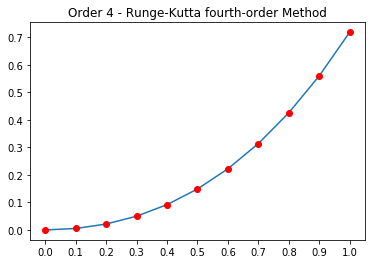

In [33]:
integrateMethod(sampleFunction1, deltaT, X0, maximumT, 4, exactSolution)

## Exercício 1

Resolver usando os métodos de Euler, Runge-Kutta segunda ordem e Runge-Kutta quarta ordem, para 0 <= t <= 2

y'(t) = -2t y(t)ˆ2

Condição inicial y(0) = 1

SoluçãoExata y(t) = 1 / 1 + tˆ2

## Running Euler Method

+---------------------+-------------------+-------------------+
|          t          |       Result      |   Exact Solution  |
+---------------------+-------------------+-------------------+
|         0.0         |        1.0        |         1         |
|         0.1         |  1.00000000000000 | 0.990099009900990 |
|         0.2         | 0.980000000000000 | 0.961538461538461 |
| 0.30000000000000004 | 0.941584000000000 | 0.917431192660550 |
|         0.4         | 0.888389174256640 | 0.862068965517241 |
|         0.5         | 0.825250348261728 | 0.800000000000000 |
|  0.6000000000000001 | 0.757146534531118 | 0.735294117647059 |
|  0.7000000000000001 | 0.688354029560820 | 0.671140939597315 |
|         0.8         | 0.622017651759054 | 0.609756097560976 |
|         0.9         | 0.560112698303078 | 0.552486187845304 |
|         1.0         | 0.503641976039014 | 0.500000000000000 |
|         1.1         | 0.452910928033318 | 0.452488687782805 |
|  1.2000000000

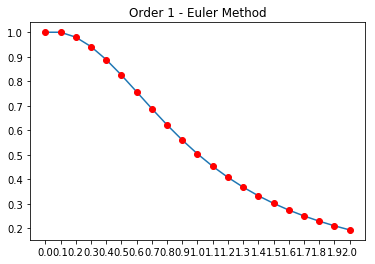

In [34]:
functionAssignmet1 = -2*t*(y**2)
deltaT = 0.1
X0 = 1.0
maximumT = 2.0
exactSolution = 1/(1+t**2)

integrateMethod(functionAssignmet1, deltaT, X0, maximumT, 1, exactSolution)

## Running Runge-Kutta second-order Method

+---------------------+-------------------+-------------------+
|          t          |       Result      |   Exact Solution  |
+---------------------+-------------------+-------------------+
|         0.0         |        1.0        |         1         |
|         0.1         | 0.990000000000000 | 0.990099009900990 |
|         0.2         | 0.961365554431920 | 0.961538461538461 |
| 0.30000000000000004 | 0.917245807332359 | 0.917431192660550 |
|         0.4         | 0.861954319809959 | 0.862068965517241 |
|         0.5         | 0.800034025054427 | 0.800000000000000 |
|  0.6000000000000001 | 0.735527018675442 | 0.735294117647059 |
|  0.7000000000000001 | 0.671587054764514 | 0.671140939597315 |
|         0.8         | 0.610398784831307 | 0.609756097560976 |
|         0.9         | 0.553289088518793 | 0.552486187845304 |
|         1.0         | 0.500918575857537 | 0.500000000000000 |
|         1.1         | 0.453478840017636 | 0.45248868778280

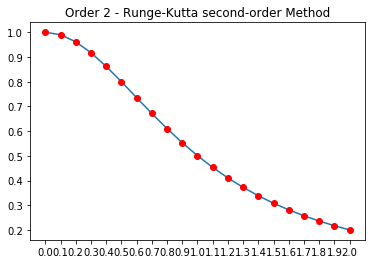

In [35]:
integrateMethod(functionAssignmet1, deltaT, X0, maximumT, 2, exactSolution)

## Running Runge-Kutta fourth-order Method

+---------------------+-------------------+-------------------+
|          t          |       Result      |   Exact Solution  |
+---------------------+-------------------+-------------------+
|         0.0         |        1.0        |         1         |
|         0.1         | 0.990098924950166 | 0.990099009900990 |
|         0.2         | 0.961538143658087 | 0.961538461538461 |
| 0.30000000000000004 | 0.917430597519571 | 0.917431192660550 |
|         0.4         | 0.862068183488285 | 0.862068965517241 |
|         0.5         | 0.799999209018538 | 0.800000000000000 |
|  0.6000000000000001 | 0.735293500279022 | 0.735294117647059 |
|  0.7000000000000001 | 0.671140619517870 | 0.671140939597315 |
|         0.8         | 0.609756119188268 | 0.609756097560976 |
|         0.9         | 0.552486529856882 | 0.552486187845304 |
|         1.0         | 0.500000602210524 | 0.500000000000000 |
|         1.1         | 0.452489476091988 | 0.45248868778280

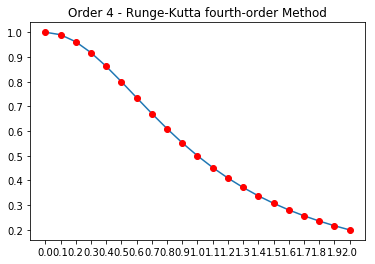

In [36]:
integrateMethod(functionAssignmet1, deltaT, X0, maximumT, 4, exactSolution)

## Running Runge-Kutta fourth-order Method

+---------------------+-------------------+-------------------+
|          t          |       Result      |   Exact Solution  |
+---------------------+-------------------+-------------------+
|         0.0         |         1         |         1         |
|         0.1         | 0.990098924950166 | 0.990099009900990 |
|         0.2         | 0.961538143658087 | 0.961538461538461 |
| 0.30000000000000004 | 0.917430597519571 | 0.917431192660550 |
|         0.4         | 0.862068183488285 | 0.862068965517241 |
|         0.5         | 0.799999209018538 | 0.800000000000000 |
|  0.6000000000000001 | 0.735293500279022 | 0.735294117647059 |
|  0.7000000000000001 | 0.671140619517870 | 0.671140939597315 |
|         0.8         | 0.609756119188268 | 0.609756097560976 |
|         0.9         | 0.552486529856882 | 0.552486187845304 |
|         1.0         | 0.500000602210524 | 0.500000000000000 |
|         1.1         | 0.452489476091988 | 0.45248868778280

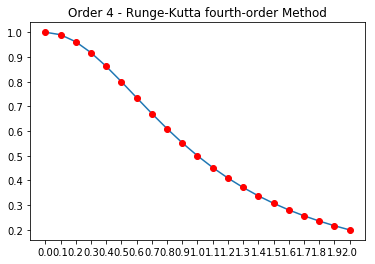

In [37]:
integrateMethod(functionAssignmet1, 0.1, 1, 2, 4, exactSolution)

In [38]:
## 2 ODE Second-Order
def solveSecondOrder(function, delta, X0, XX0, maximumT, method, exactSolution = 0):
	"""
	Implements: Solve ODE Second-Order
	Arguments:
		function: function to apply the method
		delta: size of the integration step
		X0: initial condition x(0)
		XX0: initial condition x'(0)
		maximumT: limit of integration (0 <= t <= maximumT)
		method: related to the algorithm that will be used
		exactSolution: function that represents the exact result of the algorithm
	Return: print table and graph of [[t,result]] and add exactSoluction on table if provided
	""" 
    
	# method 0 = Second order Taylor approximation
	# method 1 = Runge Kutta Nystrom Method

	# define symbols that will be used
	global symbolsList
	symbolsList = [t, y, yy]

	title = ""
	results = []

	if (method == 0):
		title = "Second order Taylor approximation"
		results = taylorSerieAproximation(function, delta, X0, XX0, maximumT)
	elif (method == 1):
		title = "Runge Kutta Nystrom Method"
		results = rungeKuttaNystrom(function, delta, X0, XX0, maximumT)
	else:
		print("Method not defined. Please choose 0 or 1.")
		return

	if exactSolution == 0:
		print(table(results),"\n\n")
	else:
		print(tableComparison(results, exactSolution),"\n\n")


	x_val = [x[0] for x in results]
	y_val = [x[1] for x in results]

	plt.title(title)
	plt.plot(x_val,y_val)
	plt.plot(x_val,y_val,'or')
	plt.xticks(x_val)
	plt.show()

## Exemplos do slide para ODE de segunda ordem

z''(t) = -g -z'(t) |z'(t)|

Condição inicial z'(0) = 0.0, z(0) = 0.0

SoluçãoExata t = 1.0s, x = -2.4408m

## Running Second order Taylor approximation

+---------------------+---------------------+
|          t          |        Result       |
+---------------------+---------------------+
|         0.0         |         0.0         |
|         0.1         | -0.0490332500000000 |
|         0.2         |  -0.191324480788875 |
| 0.30000000000000004 |  -0.409479590404989 |
|         0.4         |  -0.677108512480890 |
|         0.5         |  -0.970860619370258 |
|  0.6000000000000001 |  -1.27632022638739  |
|  0.7000000000000001 |  -1.58652907246303  |
|         0.8         |  -1.89857312076523  |
|         0.9         |  -2.21131192601926  |
|         1.0         |  -2.52431163493220  |
+---------------------+---------------------+ 




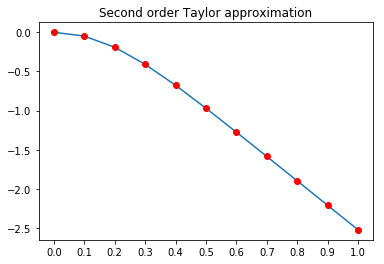

In [39]:
sampleFunction2 = -9.80665 - 1.0*yy*Abs(yy)
deltaT = 0.1
X0 = 0.0
XX0 = 0.0
maximumT = 1.0

solveSecondOrder(sampleFunction2, deltaT, X0, XX0, maximumT, 0)

## Running Runge Kutta Nystrom Method

+---------------------+---------------------+
|          t          |        Result       |
+---------------------+---------------------+
|         0.0         |         0.0         |
|         0.1         | -0.0482512373891861 |
|         0.2         |  -0.184506422805615 |
| 0.30000000000000004 |  -0.388474844916514 |
|         0.4         |  -0.637970518176445 |
|         0.5         |  -0.915344349120175 |
|  0.6000000000000001 |  -1.20882020470097  |
|  0.7000000000000001 |  -1.51128450866869  |
|         0.8         |  -1.81867125706053  |
|         0.9         |  -2.12872558508312  |
|         1.0         |  -2.44021732318481  |
+---------------------+---------------------+ 




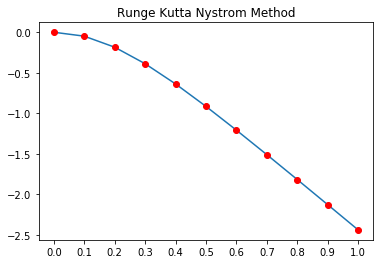

In [40]:
solveSecondOrder(sampleFunction2, deltaT, X0, XX0, maximumT, 1)

## Exercício 2

Resolver usando os métodos Expansão em Série de Taylor e Runge- Kutta-Nystron para 0 <= t <= 100

c = 0.2, k = 1, w = 0.5

y''(t) = - c*y'(t) - k*y(t) + 2*sin(w*t)+sin(2*w*t)+cos(3*w*t)

## Running Second order Taylor approximation

+---------------------+----------------------+
|          t          |        Result        |
+---------------------+----------------------+
|         0.0         |         0.0          |
|         0.1         | 0.00500000000000000  |
|         0.2         |  0.0208178141656211  |
| 0.30000000000000004 |  0.0489013604087945  |
|         0.4         |  0.0903172209901100  |
|         0.5         |  0.145743352416653   |
|  0.6000000000000001 |  0.215470733071609   |
|  0.7000000000000001 |  0.299413571590902   |
|         0.8         |  0.397127517841640   |
|         0.9         |  0.507835154120369   |
|         1.0         |  0.630457900288396   |
|         1.1         |  0.763653345904154   |
|  1.2000000000000002 |  0.905856927340634   |
|         1.3         |   1.05532680011806   |
|  1.4000000000000001 |   1.21019071732066   |
|         1.5         |   1.36849371441902   |
|         1.6         |   1.52824541883567   |
|  1.700000000

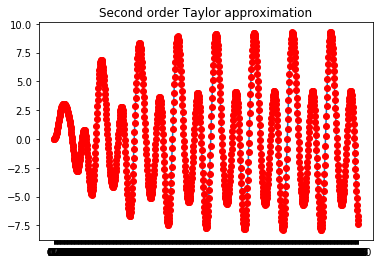

In [44]:
c = 0.2
k = 1
w = 0.5
functionAssignmet2 = - c*yy - k*y + 2*sin(w*t)+sin(2*w*t)+cos(3*w*t)

deltaT = 0.1
X0 = 0.0
XX0 = 0.0
maximumT = 100

solveSecondOrder(functionAssignmet2, deltaT, X0, XX0, maximumT, 0)

## Running Runge Kutta Nystrom Method

+---------------------+---------------------+
|          t          |        Result       |
+---------------------+---------------------+
|         0.0         |         0.0         |
|         0.1         | 0.00528494405105416 |
|         0.2         |  0.0221542467286030 |
| 0.30000000000000004 |  0.0518441851163707 |
|         0.4         |  0.0952033277983139 |
|         0.5         |  0.152691979818289  |
|  0.6000000000000001 |  0.224390273350890  |
|  0.7000000000000001 |  0.310014377373386  |
|         0.8         |  0.408940133551078  |
|         0.9         |  0.520233279186848  |
|         1.0         |  0.642685294382445  |
|         1.1         |  0.774853811905718  |
|  1.2000000000000002 |  0.915106456447569  |
|         1.3         |   1.06166693614404  |
|  1.4000000000000001 |   1.21266219393861  |
|         1.5         |   1.36616943941470  |
|         1.6         |   1.52026192233658  |
|  1.7000000000000002 |   1.6730523758724

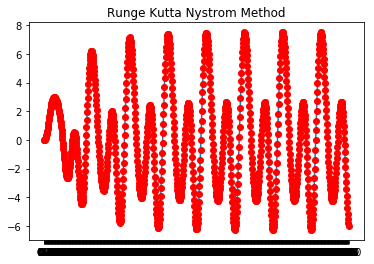

In [46]:
solveSecondOrder(functionAssignmet2, deltaT, X0, XX0, maximumT, 1)